<a href="https://colab.research.google.com/github/niked0/mvpnba/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução - Dataset NBA

Como um entusiasta e amante do esporte, ao escolher este dataset para a analise exploratória e pré-processamento, fiquei com curiosidades que me instigavam e acredito que a muitas das pessoas que assistem dividem também essa paixão.
Por isso, com as informações que estão presentes no dataset, sendo elas:

*   rk: Rank (classificação)
*   player: Nome do jogador
*   pos: Posição do jogador
*   age: Idade do jogador
*   tm: Time (equipe)
*   g: Partidas jogadas (games)
*   gs: Partidas iniciadas como titular (games started)
*   mp: Minutos jogados (minutes played)
*   fg: Cestas convertidas (field goals made)
*   fga: Tentativas de cesta (field goals attempted)
*   fg_2: Percentual de acerto de cestas de campo (field goal percentage)
*   3p: Cestas de 3 pontos convertidas (3-point field goals made)
*   3pa: Tentativas de cesta de 3 pontos (3-point field goals attempted)
*   3p_2: Percentual de acerto de cestas de 3 pontos (3-point field goal percentage)
*   2p: Cestas de 2 pontos convertidas (2-point field goals made)
*   2pa: Tentativas de cesta de 2 pontos (2-point field goals attempted)
*   2p_2: Percentual de acerto de cestas de 2 pontos (2-point field goal percentage)
*   efg: Percentual de acerto de cestas ajustado (effective field goal percentage)
*   ft: Lances livres convertidos (free throws made)
*   fta: Tentativas de lance livre (free throws attempted)
*   ft_2: Percentual de acerto de lances livres (free throw percentage)
*   orb: Rebotes ofensivos (offensive rebounds)
*   drb: Rebotes defensivos (defensive rebounds)
*   trb: Total de rebotes (total rebounds) ast: Assistências (assists)
*   stl: Roubadas de bola (steals)  
*   blk: Tocos (blocks)
*   tov: Perdas de bola (turnovers)
*   pf: Faltas pessoais (personal fouls)
*   pts: Pontos (points)
*   year: Ano
*   MVP: Foi o jogador mais valioso da temporada?

Podemos extrair dúvidas e análises sob o dataset;

1.   Qual a distribuição de jogadores que receberam o prêmio de MVP entre os times da NBA?
1.   Quais são os principais critérios levados em consideração ao escolher um jogador MVP?
3.   Os jogadores MVPs estão quanto acima dos outros jogadores de cada temporada?

Com isso, acredito que também seja possível utilizar metodologias de Machine Learning para predizer quais são os prováveis grupos de melhores jogadores nas próximas temporadas e que serão competidores entre o prêmio de MVP.

---




In [ ]:
#Importando bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import missingno as ms
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



url_dados = 'https://raw.githubusercontent.com/niked0/mvpnba/main/NBA_Player_Statsm_mvp.csv'

nba = pd.read_csv(url_dados)

# Separar apenas status importantes para análises
status_nba = nba.loc[:, ['Player', 'Age', 'FG', '3P', '2P', 'AST', 'TOV', 'PTS', 'MVP']]

# Contagem de MVPs por jogador
mvp_players = nba[nba['MVP']]

# Separar os jogadores que receberam o MVP dos que não receberam
non_mvp_players = status_nba[~status_nba['MVP']]

# Contagem de MVPs por time
mvp_counts = mvp_players['Tm'].value_counts()

# Converter a coluna 'Season' para representar o início do ano da temporada
nba['Year_Start'] = nba['Season'].apply(lambda x: int(x.split('-')[0]))
status_nba['Year_Start'] = nba['Season'].apply(lambda x: int(x.split('-')[0]))



Para a análise, são necessários separar alguns dataframes e utilizar algumas funções para checar a integridade e o corpo do dataset e importar algumas bibliotecas que serão utilizadas no processo.

#2. Verificação do dataset

In [ ]:
# Verificando que nba é um dataframe
type(nba)

pandas.core.frame.DataFrame

In [ ]:
#Verificando primeiras linhas
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP,Year_Start
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,0.2,1.0,0.161,3.2,7.8,0.405,0.386,0.5,0.5,1.000,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-98,False,1997
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,0.1,0.3,0.211,2.4,5.7,0.414,0.409,1.4,2.1,0.672,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-98,False,1997
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,0.3,0.6,0.412,7.7,15.8,0.488,0.493,6.1,7.8,0.784,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-98,False,1997
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,1.1,2.9,0.375,1.8,3.7,0.469,0.510,1.3,1.7,0.784,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-98,False,1997
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,0.5,1.7,0.313,1.1,2.2,0.494,0.483,0.7,1.0,0.676,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-98,False,1997


In [ ]:
# exibindo as últimas linhas
nba.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP,Year_Start
14568,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,0.7,1.7,0.395,1.9,3.9,0.495,0.524,0.5,1.0,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2021-22,False,2021
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,6.3,12.3,0.512,0.536,6.6,7.3,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-22,False,2021
14570,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,0.0,0.2,0.091,2.3,4.2,0.547,0.528,0.7,1.1,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2021-22,False,2021
14571,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,0.567,0.0,0.1,0.000,1.9,3.2,0.593,0.567,1.4,1.8,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2021-22,False,2021
14572,605,Ivica Zubac,C,24,LAC,76,76,24.4,4.1,6.5,0.626,0.0,0.0,NaN,4.1,6.5,0.626,0.626,2.2,3.0,0.727,2.9,5.6,8.5,1.6,0.5,1.0,1.5,2.7,10.3,2021-22,False,2021


In [ ]:
# exibindo os nomes das colunas
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season',
       'MVP', 'Year_Start'],
      dtype='object')

In [ ]:
# exibindo as dimensões do dataset
nba.shape

(14573, 33)

In [ ]:
# exibindo a quantidade de linhas por coluna
nba.count()

Rk            14573
Player        14573
Pos           14573
Age           14573
Tm            14573
G             14573
GS            14573
MP            14573
FG            14573
FGA           14573
FG%           14485
3P            14573
3PA           14573
3P%           12375
2P            14573
2PA           14573
2P%           14419
eFG%          14485
FT            14573
FTA           14573
FT%           13824
ORB           14573
DRB           14573
TRB           14573
AST           14573
STL           14573
BLK           14573
TOV           14573
PF            14573
PTS           14573
Season        14573
MVP           14573
Year_Start    14573
dtype: int64

In [ ]:
# exibindo um sumário estatístico
nba.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year_Start
count,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14485.000000,14573.000000,14573.000000,12375.000000,14573.000000,14573.000000,14419.000000,14485.000000,14573.000000,14573.000000,13824.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000
mean,244.332876,26.705483,45.544500,21.565429,19.623626,2.932046,6.598586,0.432377,0.590894,1.703637,0.284298,2.341529,4.895409,0.464823,0.473485,1.401283,1.872422,0.726241,0.909984,2.522013,3.429953,1.758114,0.621540,0.390167,1.132368,1.781740,7.853057,2009.765045
std,139.596859,4.252495,26.110389,27.035594,9.957188,2.133970,4.541544,0.104592,0.698191,1.840081,0.160299,1.859938,3.698337,0.113274,0.109297,1.350654,1.700262,0.152562,0.804527,1.766841,2.433847,1.761888,0.439759,0.460479,0.787383,0.826657,5.840447,7.279212
min,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.000000
25%,124.000000,23.000000,22.000000,0.000000,11.400000,1.300000,3.100000,0.393000,0.000000,0.100000,0.222000,1.000000,2.100000,0.423000,0.438000,0.500000,0.700000,0.660000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.600000,1.200000,3.400000,2004.000000
50%,243.000000,26.000000,48.000000,7.000000,18.900000,2.400000,5.500000,0.435000,0.300000,1.100000,0.326000,1.800000,3.900000,0.470000,0.483000,1.000000,1.400000,0.750000,0.700000,2.200000,2.900000,1.200000,0.500000,0.200000,1.000000,1.800000,6.400000,2010.000000
75%,361.000000,30.000000,70.000000,39.000000,27.700000,4.100000,9.200000,0.479000,1.000000,2.800000,0.375000,3.300000,6.800000,0.514000,0.524000,1.900000,2.500000,0.822000,1.300000,3.300000,4.600000,2.300000,0.900000,0.500000,1.500000,2.400000,11.100000,2016.000000
max,605.000000,44.000000,85.000000,83.000000,43.700000,12.200000,27.800000,1.000000,5.300000,13.200000,1.000000,12.100000,23.400000,1.000000,1.500000,10.300000,13.100000,1.000000,6.800000,12.000000,18.000000,12.800000,3.000000,6.000000,5.700000,6.000000,36.100000,2021.000000


Dadas as informações do dataset e dos dataframes retirados, podemos começar as análises gráficas sem nenhum problema previamente encotrado.

#3. Análise exploratoria

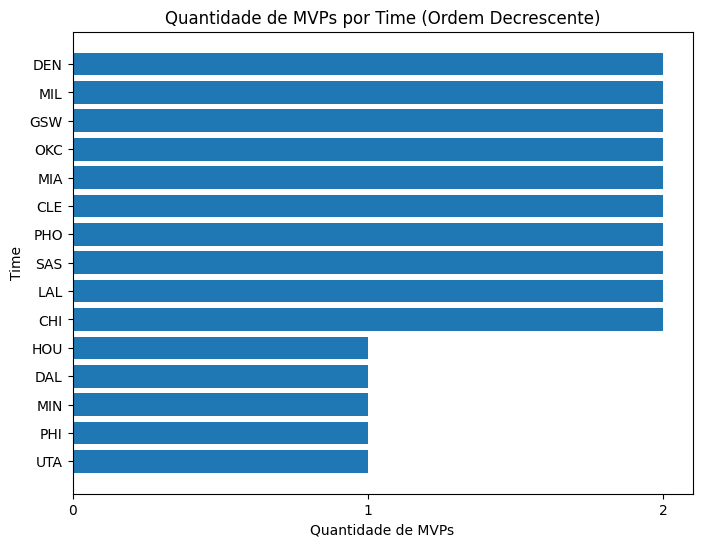

In [ ]:
# Ordenando os valores em ordem decrescente
mvp_counts = mvp_counts.sort_values(ascending=True)

# Plotando um gráfico de barras horizontais para visualizar a contagem de MVPs por time
plt.figure(figsize=(8, 6))
plt.barh(mvp_counts.index, mvp_counts.values)
plt.xlabel('Quantidade de MVPs')
plt.ylabel('Time')
plt.title('Quantidade de MVPs por Time (Ordem Decrescente)')

# Definindo o intervalo e os valores inteiros para o eixo x
plt.xticks(np.arange(0, mvp_counts.max() + 1, step=1))

plt.show()




Agora é possível responder a primeira pergunta feita, existe uma grande distribuição dos MVPS entre os times dado o periodo do dataset, parece não haver nenhum time destaque para com os MVPs.

<ipython-input-136-6de706d79cd9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(status_nba.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)


<Axes: >

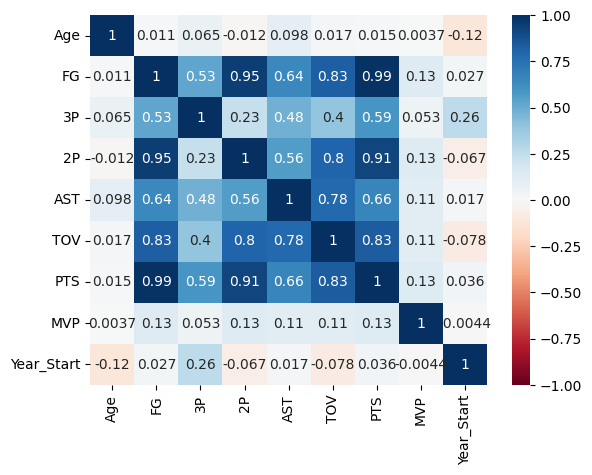

In [ ]:
#Plotando heatmap

sns.heatmap(status_nba.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)


Através das informações entregues pelo heatmap, a correlação entre os campos que se mostram mais importantes para a coluna MVP são: pontos, 2 pontos, FG(cestas convertidas), assistencias e turnovers.
Seguirei então com as análises em cima das estatisticas de pontos, turnovers e assistencias. Dado que o número dos 2 pontos e o FG estão altamente correlacionados aos pontos.

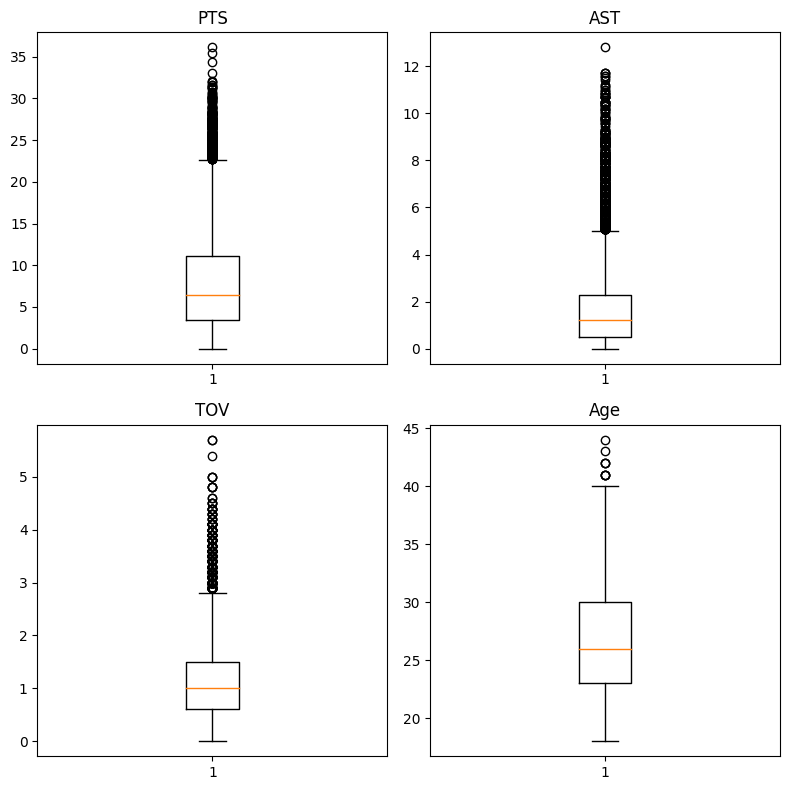

In [ ]:

#Separando espaço necessário e dimensões

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# subplot1: PTS
ax[0, 0].boxplot(status_nba['PTS'])
ax[0, 0].set_title("PTS")

# subplot2: AST
ax[0, 1].boxplot(status_nba['AST'])
ax[0, 1].set_title("AST")

# subplot3: TOV
ax[1, 0].boxplot(status_nba['TOV'])
ax[1, 0].set_title("TOV")

# subplot4: AGE
ax[1, 1].boxplot(status_nba['Age'])
ax[1, 1].set_title("Age")

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()  # Exibe os subplots


A vias de curiosidade também podemos observar a distribuição de idade dos jogadores, tendo poucos acima dos quartis.

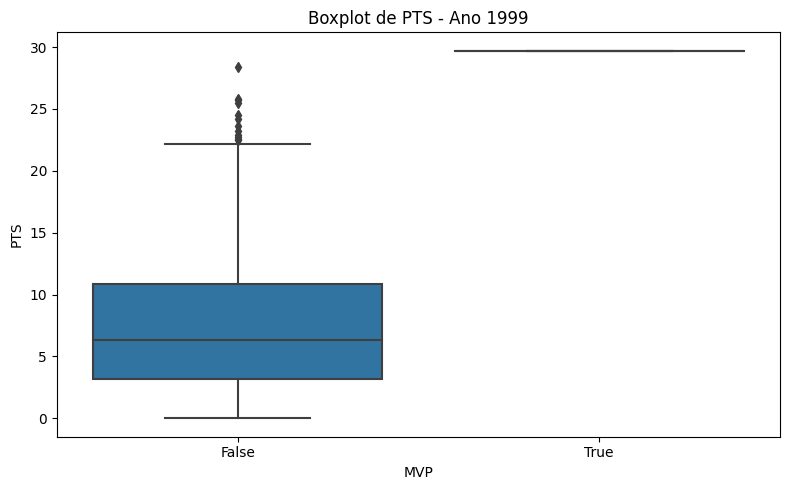

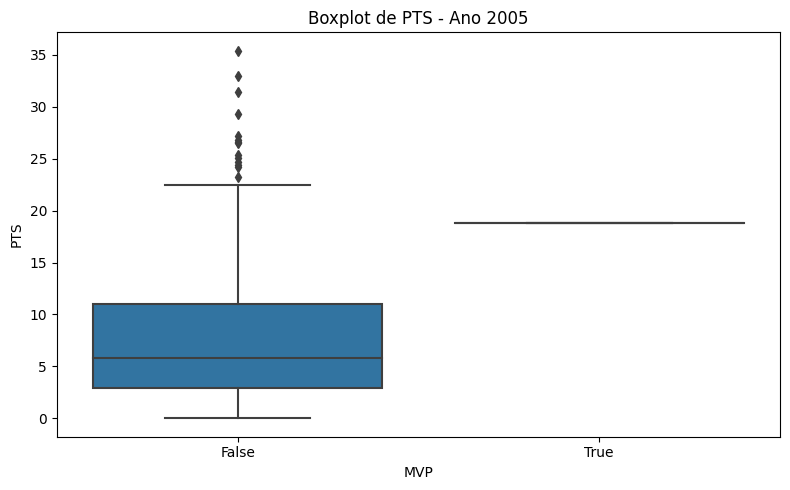

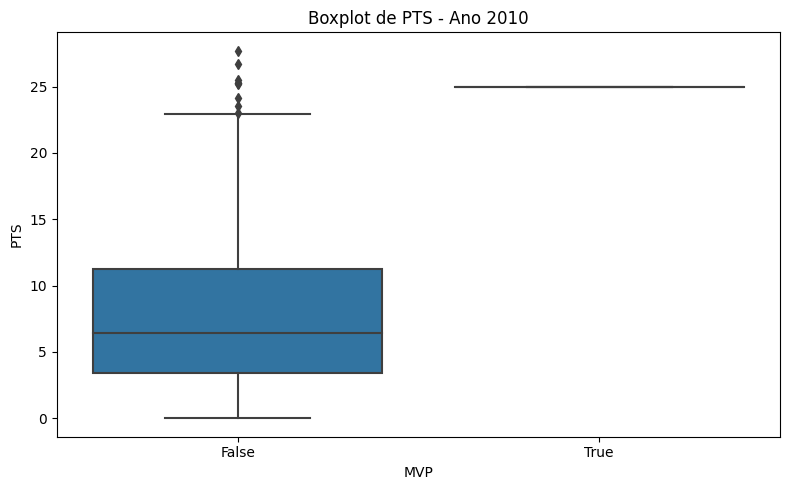

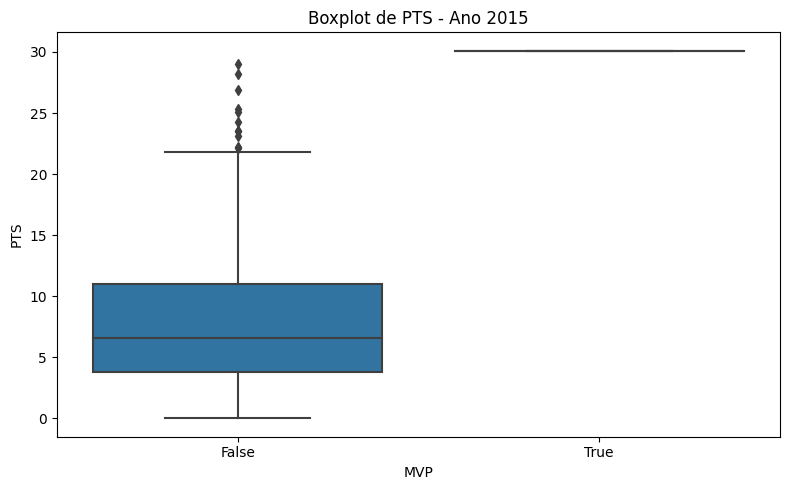

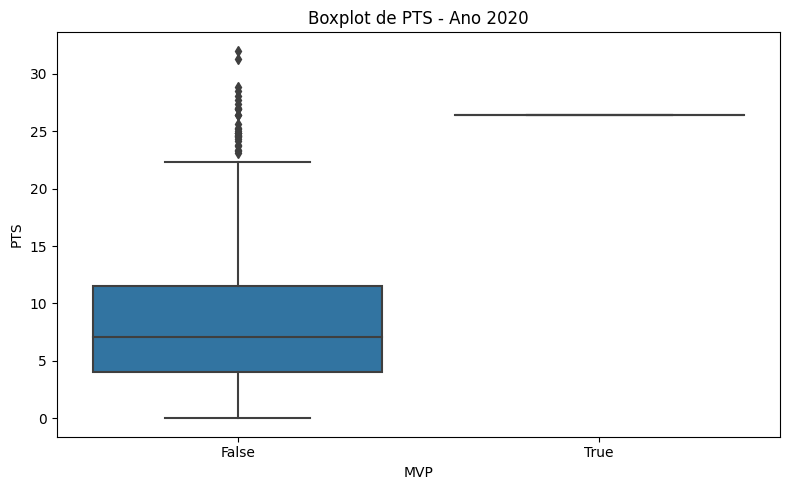

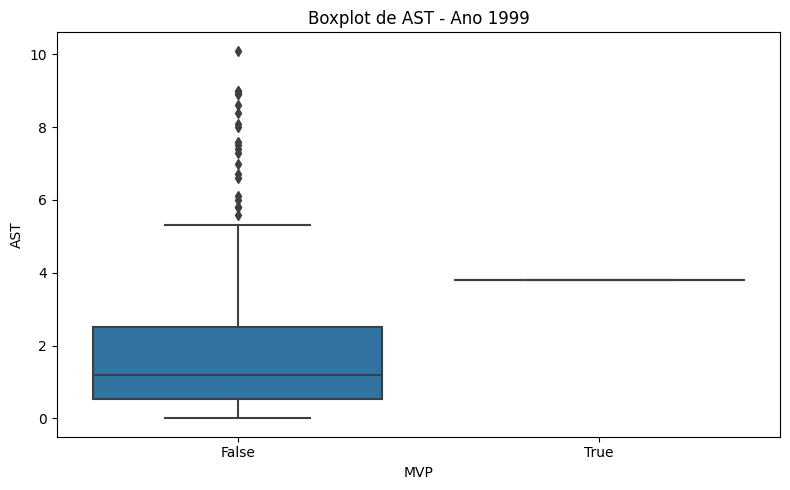

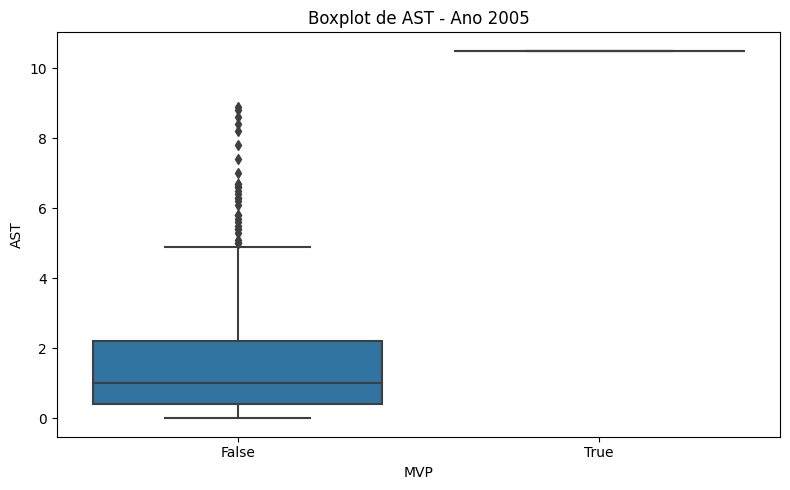

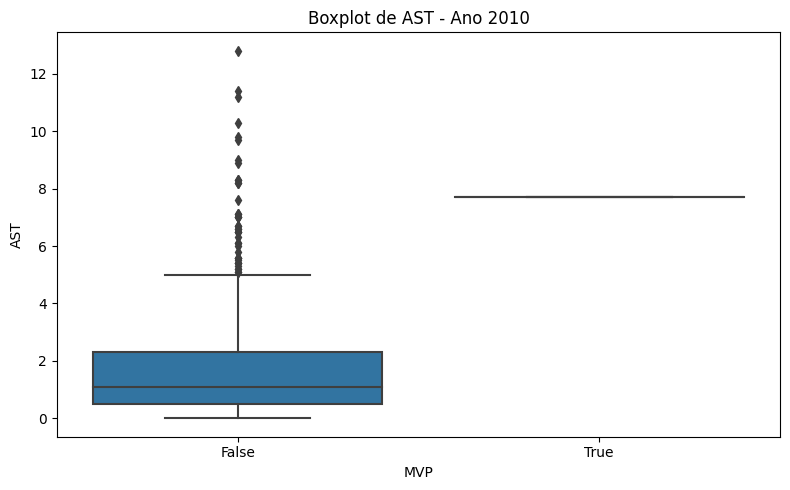

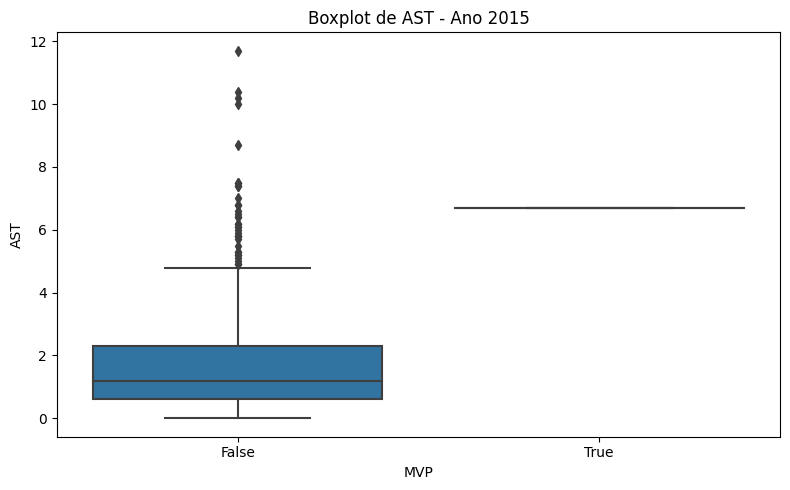

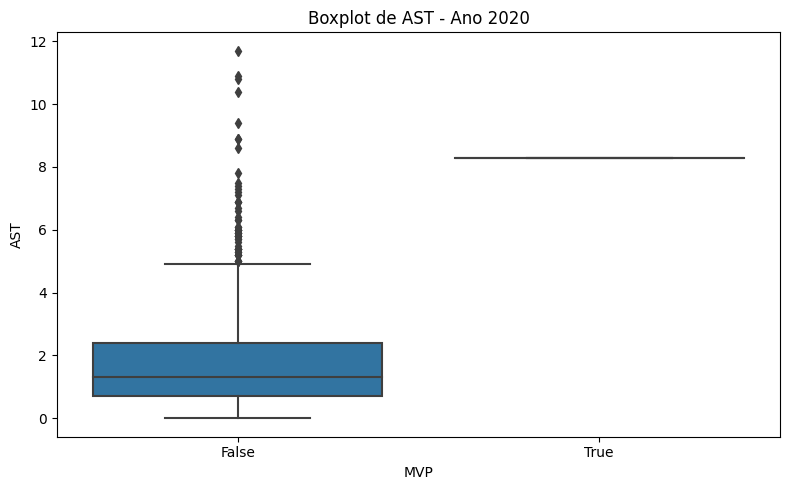

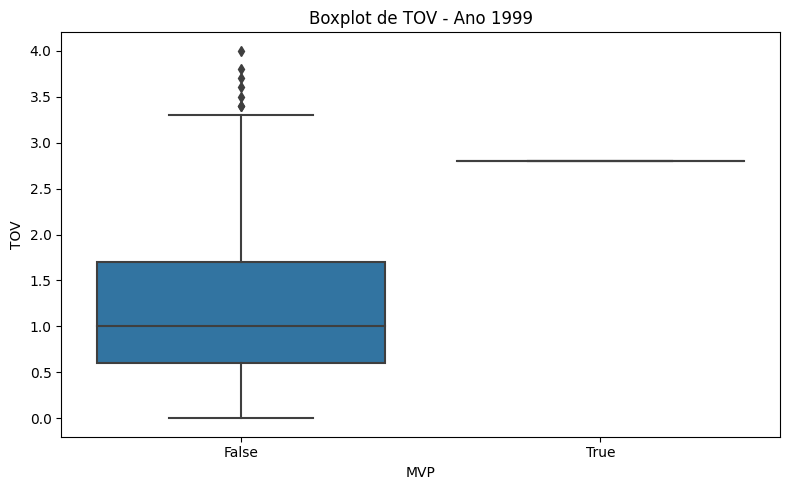

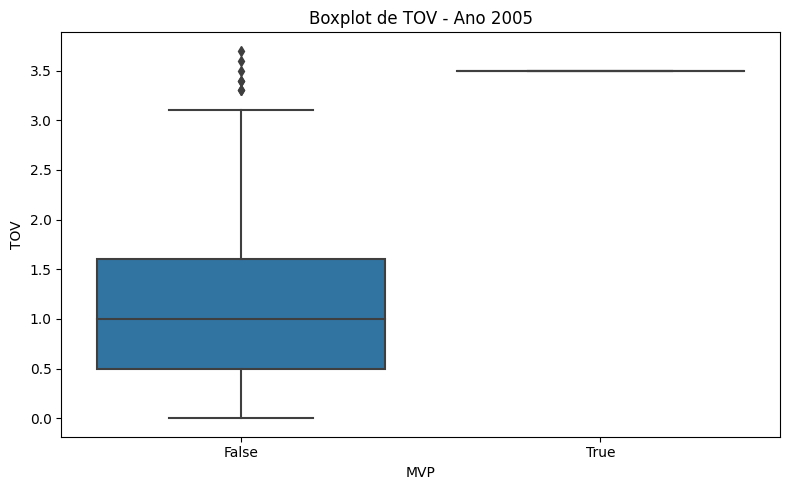

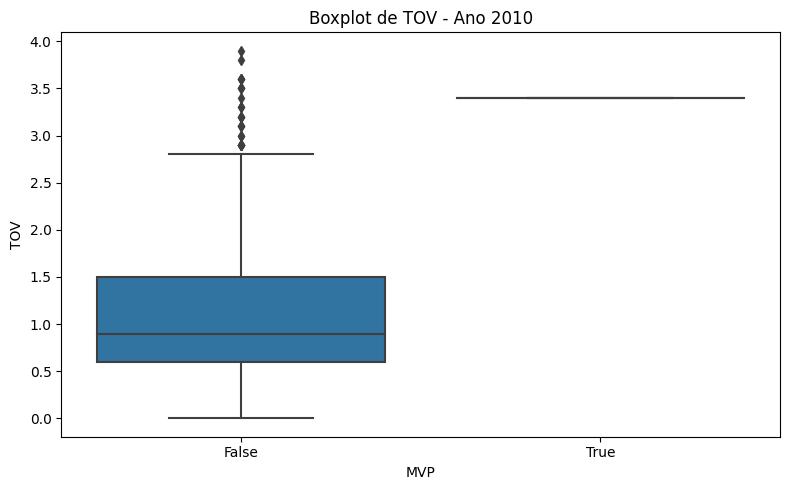

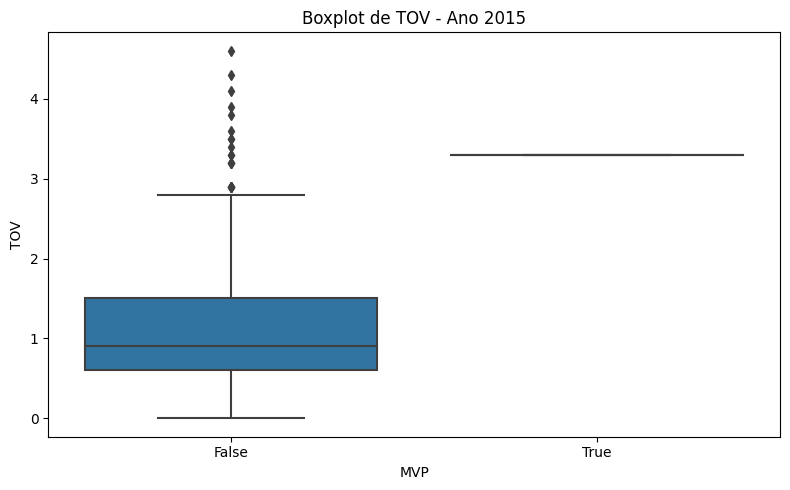

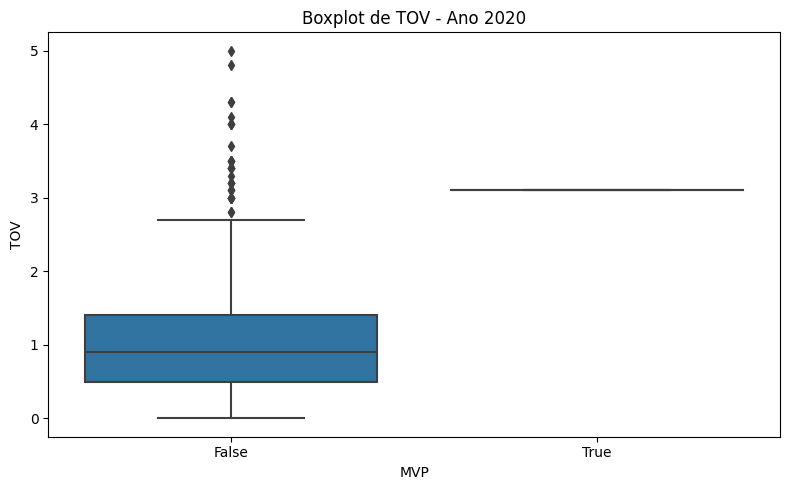

In [ ]:


# Anos específicos para comparar
anos_especificos = [1999, 2005, 2010, 2015, 2020]

for estatistica in ['PTS', 'AST', 'TOV']:
    for ano in anos_especificos:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='MVP', y=estatistica, data=status_nba[status_nba['Year_Start'] == ano])
        plt.title(f'Boxplot de {estatistica} - Ano {ano}')
        plt.xlabel('MVP')
        plt.ylabel(f'{estatistica}')
        plt.tight_layout()
        plt.show()


Os boxplots com informações dos jogadores, nos mostraram as medianas e a concentração das estatisticas dos jogadores da nba versus a média do jogador MVP no ano indicado, e em todos os anos, os jogadores MVPs se mostraram muito acima.
Até mesmo a estatisca de turnover, sendo possivel concluir que, apesar de ser uma estatistica "ruim", não é levada como um ponto negativo caso o jogador seja efetivo ao pontuar e dar assistencias para o time.

<Axes: xlabel='AST', ylabel='PTS'>

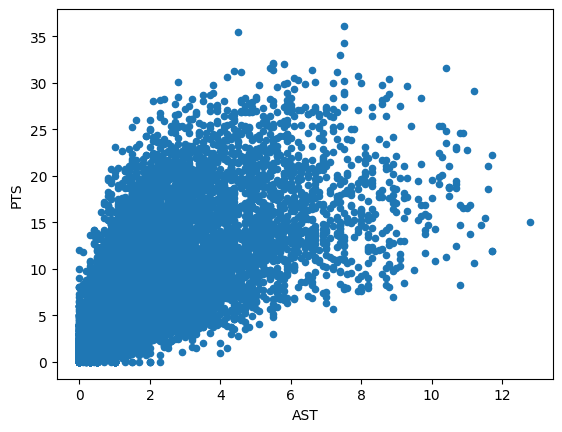

In [ ]:
# Dimensionando scatter plot
status_nba.plot(kind='scatter',
                x='AST',
                y='PTS')


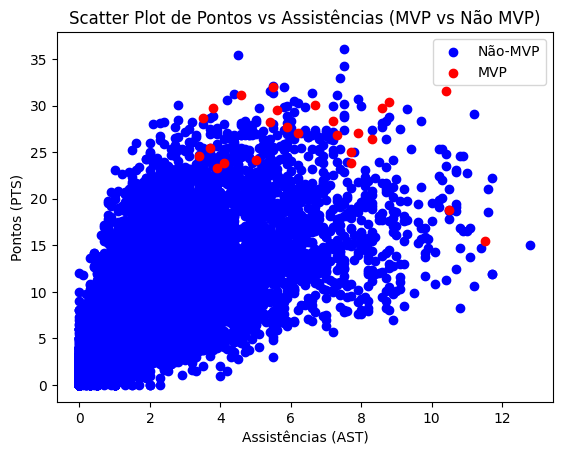

In [ ]:
# Plotar o scatter plot para os jogadores que não receberam o MVP (em azul)
plt.scatter(non_mvp_players['AST'], non_mvp_players['PTS'], color='blue', label='Não-MVP')

# Plotar o scatter plot para os jogadores que receberam o MVP (em vermelho)
plt.scatter(mvp_players['AST'], mvp_players['PTS'], color='red', label='MVP')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Assistências (AST)')
plt.ylabel('Pontos (PTS)')
plt.title('Scatter Plot de Pontos vs Assistências (MVP vs Não MVP)')
plt.legend()


plt.show()


Novamente, é possível observar que o coeficiente de pontos e assistencias dos jogadores MVPs é muito acima da média, mesmo em um quadro mais geral em relação a temporada(dessa vez todas).


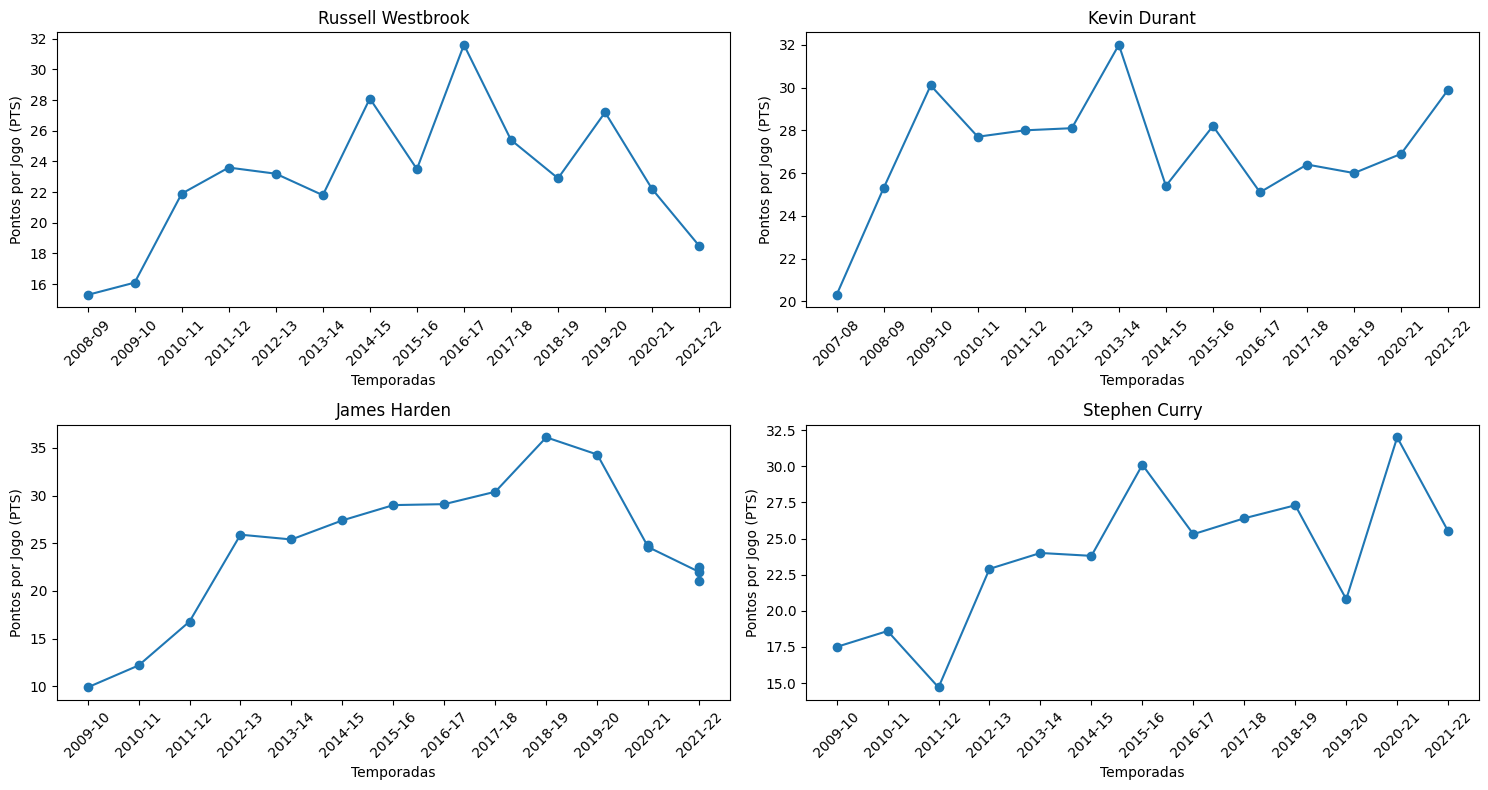

In [ ]:
# Quatro jogadores específicos que receberam o premio de MVP
jogadores = ['Russell Westbrook', 'Kevin Durant', 'James Harden', 'Stephen Curry']

# Filtrando o DataFrame para obter dados específicos desses jogadores
dados_jogadores = nba[nba['Player'].isin(jogadores)]

# Criando subplots para os gráficos individuais de cada jogador
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

for i, jogador in enumerate(jogadores):
    linha = i // 2
    coluna = i % 2
    dados_jogador = dados_jogadores[dados_jogadores['Player'] == jogador]
    axs[linha, coluna].plot(dados_jogador['Season'], dados_jogador['PTS'], marker='o')
    axs[linha, coluna].set_title(jogador)
    axs[linha, coluna].set_xlabel('Temporadas')
    axs[linha, coluna].set_ylabel('Pontos por Jogo (PTS)')
    axs[linha, coluna].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


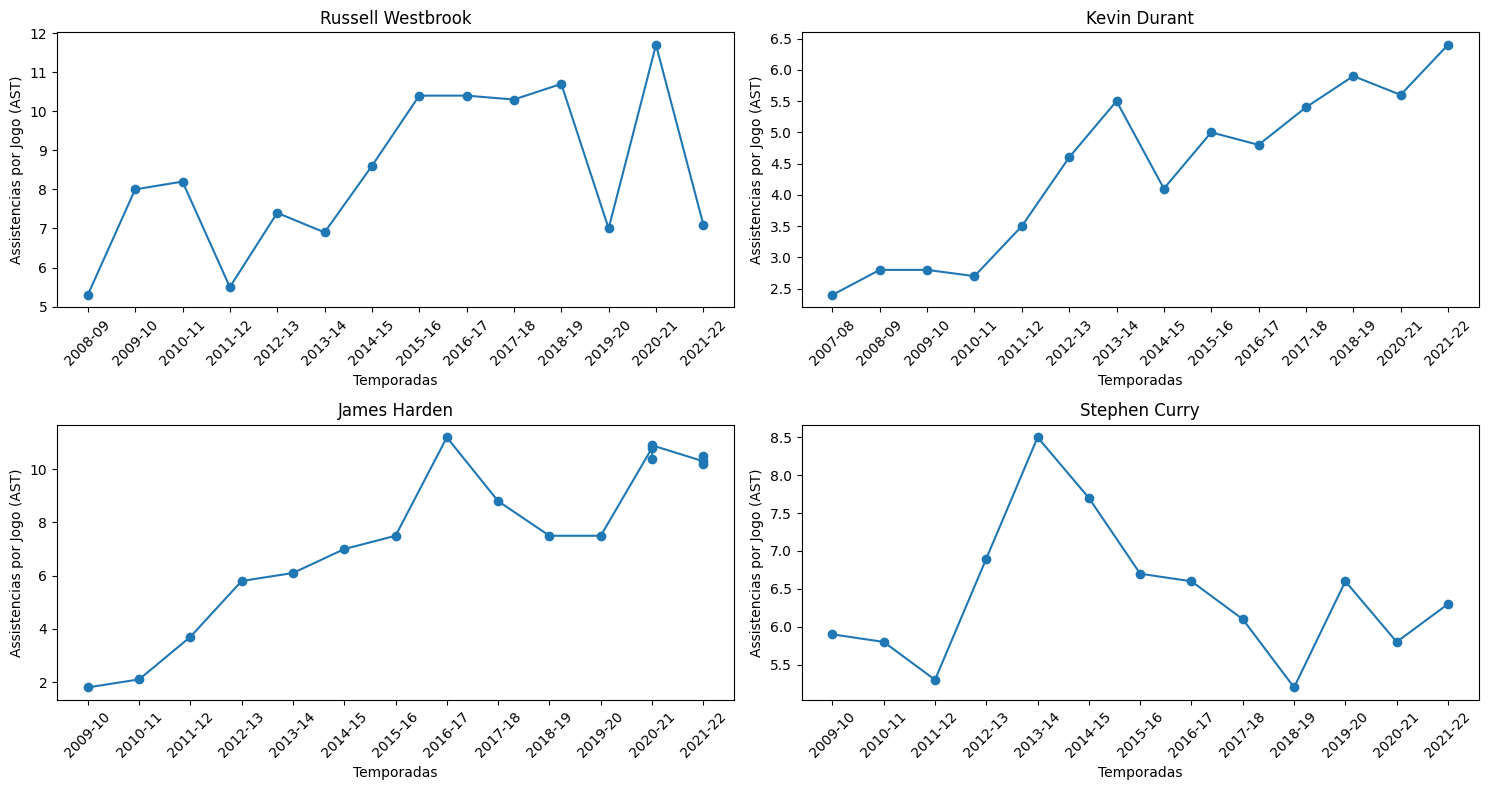

In [ ]:
# Criando subplots para os gráficos individuais de assistencias de cada jogador
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

for i, jogador in enumerate(jogadores):
    linha = i // 2
    coluna = i % 2
    dados_jogador = dados_jogadores[dados_jogadores['Player'] == jogador]
    axs[linha, coluna].plot(dados_jogador['Season'], dados_jogador['AST'], marker='o')
    axs[linha, coluna].set_title(jogador)
    axs[linha, coluna].set_xlabel('Temporadas')
    axs[linha, coluna].set_ylabel('Assistencias por Jogo (AST)')
    axs[linha, coluna].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Com o gráfico de linhas através das temporadas em que os jogadores dos quais já foram MVPs, conseguimos observar suas trajetorias e evolução, confirmando que existem informações suficientes no dataset para encontrar certos padrões de crescimento.

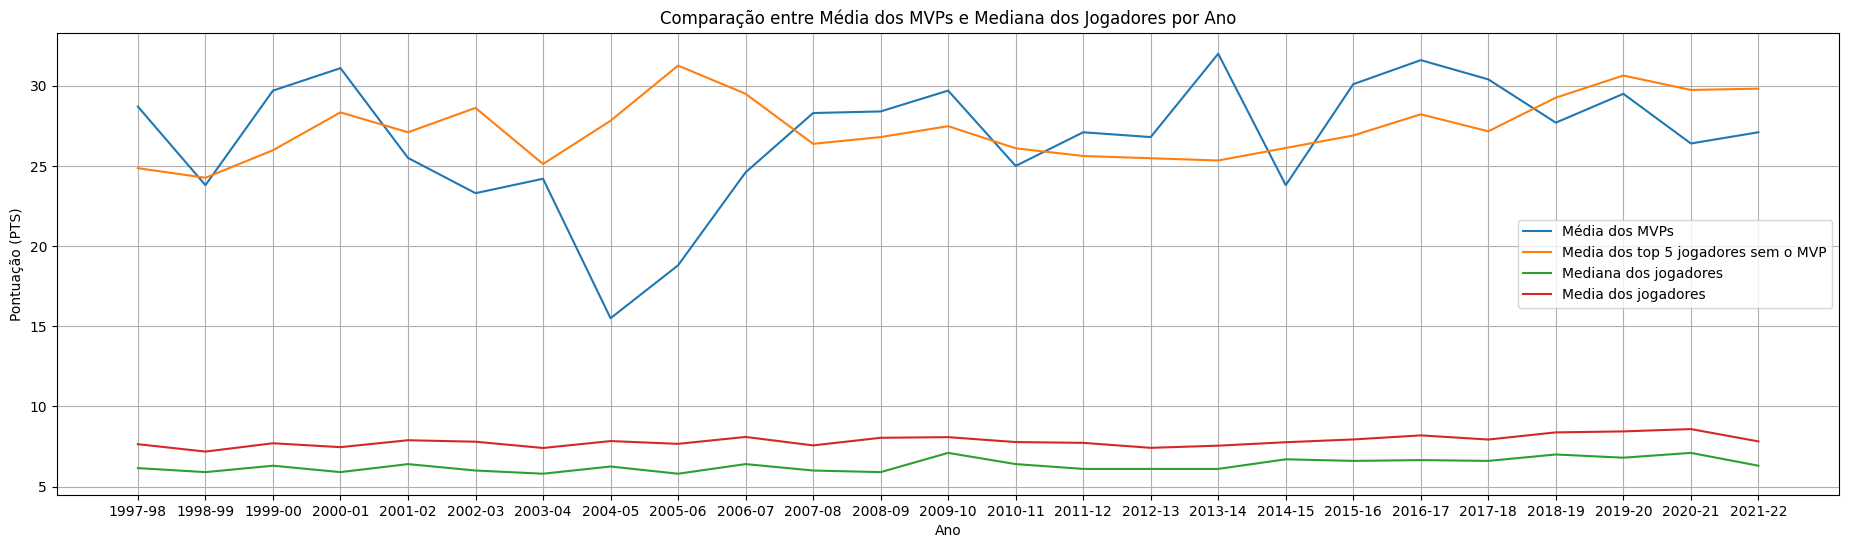

In [ ]:
# Calculando a média dos MVPs por ano
mvp_means = nba[nba['MVP'] == True].groupby('Season')['PTS'].mean()

# Calculando a mediana dos jogadores por ano
player_medians = nba.groupby('Season')['PTS'].median()

# Calculando a mediana dos jogadores por ano
player_means = nba.groupby('Season')['PTS'].mean()

# Filtrando os jogadores que não são MVP e pega os top 5 por pontos (PTS)
non_mvp_players = nba[nba['MVP'] == False]
top_players = non_mvp_players.groupby('Season').apply(lambda x: x.nlargest(5, 'PTS')).reset_index(drop=True)

# Calcula a média dos top 5 jogadores por pontos
mean_top_players = top_players.groupby('Season')['PTS'].mean()

# Criando um DataFrame com as médias dos MVPs e as medianas dos jogadores
summary_data = pd.DataFrame({'MVP_Mean': mvp_means, 'Player_Median': player_medians, 'Player_Mean' : player_means, 'Top_Players' : mean_top_players})

# Plotando o gráfico de linhas
plt.figure(figsize=(23, 6))
plt.plot(summary_data.index, summary_data['MVP_Mean'], label='Média dos MVPs')
plt.plot(summary_data.index, summary_data['Top_Players'], label='Media dos top 5 jogadores sem o MVP')
plt.plot(summary_data.index, summary_data['Player_Median'], label='Mediana dos jogadores')
plt.plot(summary_data.index, summary_data['Player_Mean'], label='Media dos jogadores')

plt.xlabel('Ano')
plt.ylabel('Pontuação (PTS)')
plt.title('Comparação entre Média dos MVPs e Mediana dos Jogadores por Ano')
plt.legend()
plt.grid(True)
plt.show()


Também existem informações o suficiente para compararmos os MVPs de cada temporada com os cinco melhores jogadores e todos os jogadores por temporada.

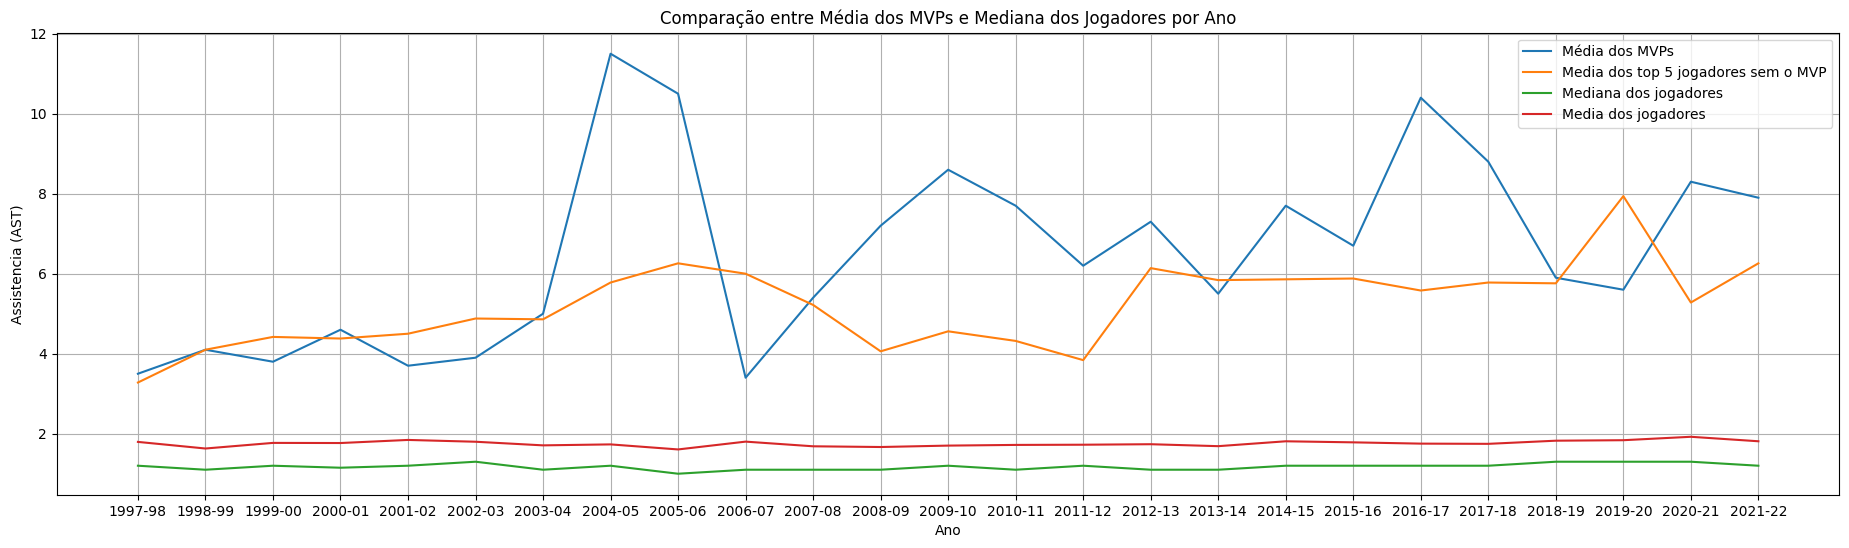

In [ ]:
# Calculando a média dos MVPs por ano
mvp_means_ast = nba[nba['MVP'] == True].groupby('Season')['AST'].mean()

# Calculando a mediana dos jogadores por ano
player_medians_ast = nba.groupby('Season')['AST'].median()

# Calculando a mediana dos jogadores por ano
player_means_ast = nba.groupby('Season')['AST'].mean()

# Filtrando os jogadores que não são MVP e pega os top 5 por assistencia (AST)
top_players_ast = non_mvp_players.groupby('Season').apply(lambda x: x.nlargest(5, 'AST')).reset_index(drop=True)

# Calculando a média dos top 5 jogadores por pontos
mean_top_players_ast = top_players.groupby('Season')['AST'].mean()

# Criando um DataFrame com as médias dos MVPs e as medianas dos jogadores
summary_data = pd.DataFrame({'MVP_Mean_AST': mvp_means_ast, 'Player_Median_AST': player_medians_ast, 'Player_Mean_AST' : player_means_ast, 'Top_Players_AST' : mean_top_players_ast})

# Plotando o gráfico de linhas
plt.figure(figsize=(23, 6))
plt.plot(summary_data.index, summary_data['MVP_Mean_AST'], label='Média dos MVPs')
plt.plot(summary_data.index, summary_data['Top_Players_AST'], label='Media dos top 5 jogadores sem o MVP')
plt.plot(summary_data.index, summary_data['Player_Median_AST'], label='Mediana dos jogadores')
plt.plot(summary_data.index, summary_data['Player_Mean_AST'], label='Media dos jogadores')

plt.xlabel('Ano')
plt.ylabel('Assistencia (AST)')
plt.title('Comparação entre Média dos MVPs e Mediana dos Jogadores por Ano')
plt.legend()
plt.grid(True)
plt.show()


Com isso, acredito que seja possivel concluir que o dataset tenha informações suficientes e é possível prosseguir para o pré-processamento.

#4. Pré-processamento do dataset



In [ ]:
# Verificando integridade das linhas
nba.isnull().sum()

Rk               0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%             88
3P               0
3PA              0
3P%           2198
2P               0
2PA              0
2P%            154
eFG%            88
FT               0
FTA              0
FT%            749
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Season           0
MVP              0
Year_Start       0
dtype: int64

Alguns nulls encontrados.

<Axes: >

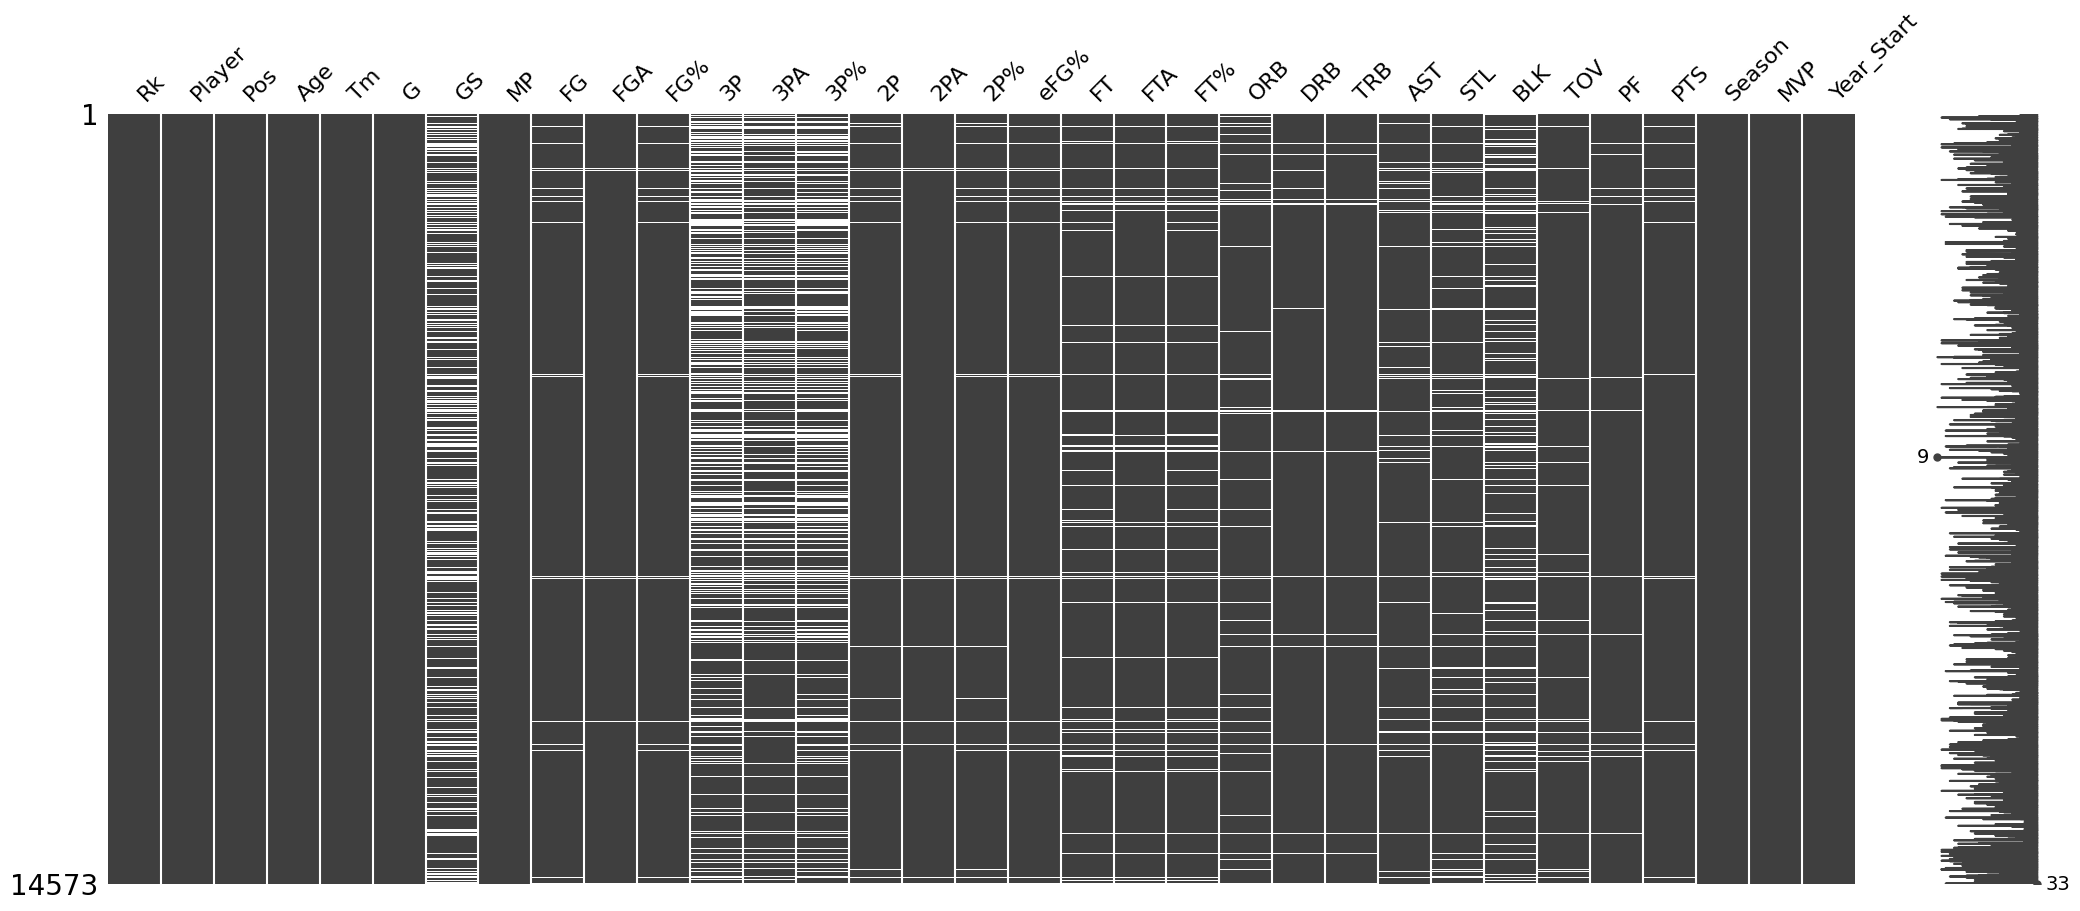

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(nba.columns)

# o novo dataset irá conter todas as colunas do dataset original
nbaSemMissings = nba[col[:]]

# substituindo os zeros por NaN
nbaSemMissings.replace(0, np.nan, inplace=True)

#Adicionando "player"
if 'Player' in nbaSemMissings.columns:
    pass
else:
    nbaSemMissings['Player'] = nba['Player']

# exibindo visualização matricial da nulidade do dataset
ms.matrix(nbaSemMissings)

Agora, com os zeros substituidos por nulls, podemos ver que foram encotrados um número muito maior de nulls.


In [ ]:
# verificando novamente nulls no dataset
nbaSemMissings.isnull().sum()

Rk               0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS            4144
MP               5
FG             311
FGA             88
FG%            311
3P            4945
3PA           3248
3P%           4163
2P             398
2PA            154
2P%            395
eFG%           311
FT             902
FTA            754
FT%            873
ORB            823
DRB            290
TRB            212
AST            609
STL            949
BLK           2359
TOV            510
PF             300
PTS            244
Season           0
MVP              0
Year_Start       0
dtype: int64

Isso já era esperado, pois existem jogadores que ficam ausentes por algumas temporadas devido a lesões e outros que nem chegam a fazer certas estatisticas dado a baixo desempenho ou metodo de jogo escolhido (pontuador, passador, defensor).
Porém, para o algoritimo de ML, será melhor preencher os valores nulos por médias, tornando mais fácil encontrar a saída esperada.

In [ ]:
# Convertendo colunas numéricas para o tipo correto (se necessário)
numeric_columns = nbaSemMissings.columns[nbaSemMissings.dtypes != object]
nbaSemMissings[numeric_columns] = nbaSemMissings[numeric_columns].apply(pd.to_numeric)

player_column = 'Player'

# Calculando as medianas por jogador
median_by_player = nbaSemMissings.groupby(player_column).median()

# Preenchendo os valores nulos com as medianas por jogador
nbaSemMissings = nbaSemMissings.set_index(player_column)
for col in numeric_columns:
    nbaSemMissings[col] = nbaSemMissings[col].fillna(nbaSemMissings.groupby(player_column)[col].transform('median'))

# Resetar o índice
nbaSemMissings = nbaSemMissings.reset_index()

# Exibir as primeiras linhas do DataFrame após a substituição dos valores nulos
print(nbaSemMissings.head())

# Substituir valores nulos por zero em todo o DataFrame
nbaSemMissings.fillna(0, inplace=True)


                Player  Rk Pos  Age   Tm   G    GS    MP   FG   FGA    FG%  \
0   Mahmoud Abdul-Rauf   1  PG   28  SAC  31   NaN  17.1  3.3   8.8  0.377   
1    Tariq Abdul-Wahad   2  SG   23  SAC  59  16.0  16.3  2.4   6.1  0.403   
2  Shareef Abdur-Rahim   3  SF   21  VAN  82  82.0  36.0  8.0  16.4  0.485   
3       Cory Alexander   4  PG   24  TOT  60  22.0  21.6  2.9   6.7  0.428   
4       Cory Alexander   4  PG   24  SAS  37   3.0  13.5  1.6   3.9  0.414   

    3P  3PA    3P%   2P   2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  \
0  0.2  1.0  0.161  3.2   7.8  0.405  0.386  0.5  0.5  1.000  0.2  1.0  1.2   
1  0.1  0.3  0.211  2.4   5.7  0.414  0.409  1.4  2.1  0.672  0.7  1.2  2.0   
2  0.3  0.6  0.412  7.7  15.8  0.488  0.493  6.1  7.8  0.784  2.8  4.3  7.1   
3  1.1  2.9  0.375  1.8   3.7  0.469  0.510  1.3  1.7  0.784  0.3  2.2  2.4   
4  0.5  1.7  0.313  1.1   2.2  0.494  0.483  0.7  1.0  0.676  0.2  1.1  1.3   

   AST  STL  BLK  TOV   PF   PTS   Season    MVP  Year_S

<ipython-input-148-0194459afa3f>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_by_player = nbaSemMissings.groupby(player_column).median()


Nulos foram trocados por médias dos próprios jogadores.

<Axes: >

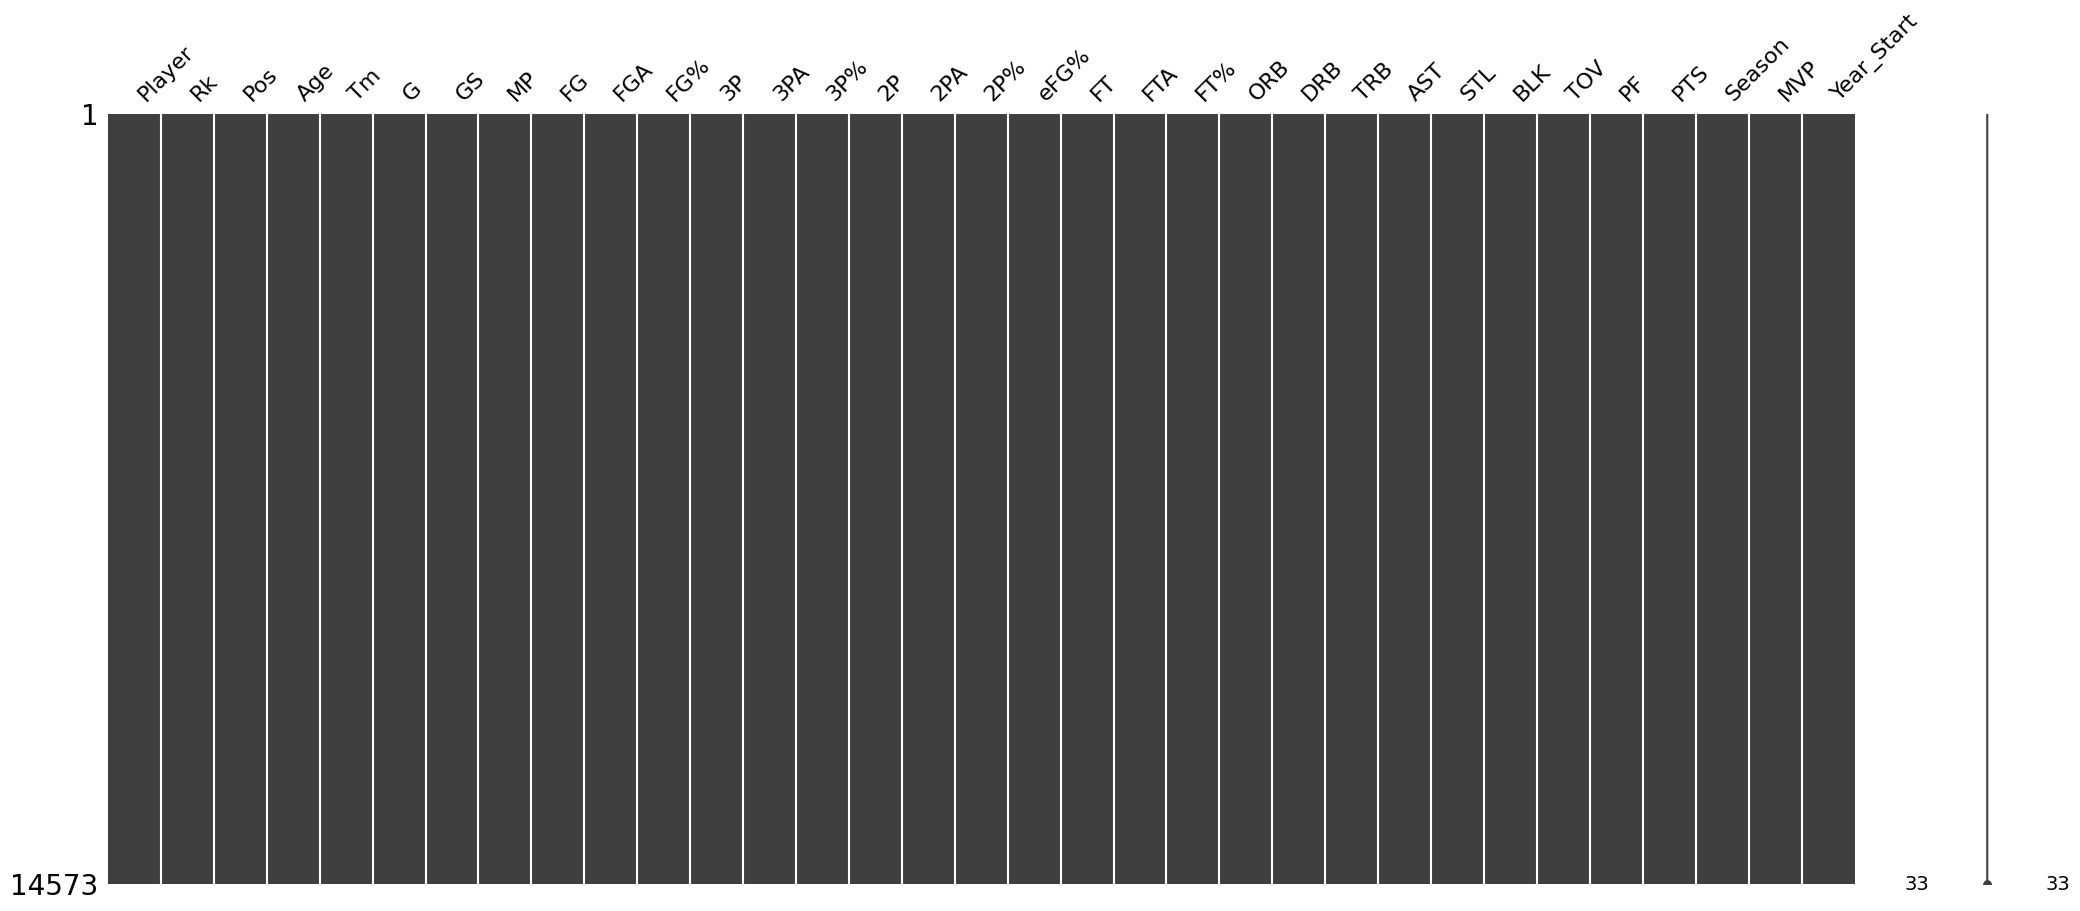

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(nbaSemMissings)

In [ ]:
# verificando novamente nulls no dataset
nbaSemMissings.isnull().sum()

Player        0
Rk            0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Season        0
MVP           0
Year_Start    0
dtype: int64

Agora que os nulos foram substituidos, podemos passar para o processo final de transformação.

In [ ]:
# Removendo colunas não importantes para consideração de MVP
# Lista das colunas a serem removidas
colunas_remover = ['Pos', 'Age', 'Tm', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'PF']

# Remover as colunas especificadas do DataFrame
nbaSemMissings = nbaSemMissings.drop(columns=colunas_remover)


#5. Normalização

In [ ]:
# Separar colunas numéricas e categóricas
colunas_numericas = ['Rk', 'G', 'GS', 'MP', 'FG', 'TOV', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'AST', 'PTS', 'Year_Start']
colunas_categoricas = ['Player', 'MVP']

# Normalização das colunas numéricas
scaler = StandardScaler()
nbaSemMissings[colunas_numericas] = scaler.fit_transform(nbaSemMissings[colunas_numericas])


# Visualizar o resultado
print(nbaSemMissings.head())

   Player        Rk         G        GS        MP        FG       FGA  \
0    1478 -1.743171 -0.557058 -0.938902 -0.253822  0.162564  0.482868   
1    2104 -1.736007  0.515349 -0.326993 -0.334195 -0.263536 -0.113567   
2    2027 -1.728844  1.396255  2.197128  1.644988  2.387752  2.161721   
3     424 -1.721680  0.553649 -0.097528  0.198276 -0.026814  0.018974   
4     424 -1.721680 -0.327256 -0.824169 -0.615500 -0.642291 -0.599550   

        FG%        3P       3PA    3P%        2P       2PA       2P%  \
0 -0.628280 -0.635836 -0.410868  0.161  0.452854  0.783890 -0.626519   
1 -0.354752 -0.782807 -0.796331  0.211  0.018153  0.213557 -0.539151   
2  0.507914 -0.488864 -0.631133  0.412  2.898045  2.956586  0.179204   
3 -0.091744  0.686907  0.635388  0.375 -0.307873 -0.329617 -0.005239   
4 -0.239028 -0.194921 -0.025406  0.313 -0.688236 -0.736997  0.237449   

       eFG%        FT       FTA       FT%       AST       TOV       PTS  \
0 -0.937751 -0.703563 -0.844487  1.734249  0.068837 -

In [ ]:
# Inicializar o LabelEncoder
encoder = LabelEncoder()

# Aplicar LabelEncoder para cada coluna categórica separadamente
for coluna in colunas_categoricas:
    nbaSemMissings[coluna] = encoder.fit_transform(nbaSemMissings[coluna])

# Visualizar o resultado
print(nbaSemMissings.head())

   Player        Rk         G        GS        MP        FG       FGA  \
0    1478 -1.743171 -0.557058 -0.938902 -0.253822  0.162564  0.482868   
1    2104 -1.736007  0.515349 -0.326993 -0.334195 -0.263536 -0.113567   
2    2027 -1.728844  1.396255  2.197128  1.644988  2.387752  2.161721   
3     424 -1.721680  0.553649 -0.097528  0.198276 -0.026814  0.018974   
4     424 -1.721680 -0.327256 -0.824169 -0.615500 -0.642291 -0.599550   

        FG%        3P       3PA    3P%        2P       2PA       2P%  \
0 -0.628280 -0.635836 -0.410868  0.161  0.452854  0.783890 -0.626519   
1 -0.354752 -0.782807 -0.796331  0.211  0.018153  0.213557 -0.539151   
2  0.507914 -0.488864 -0.631133  0.412  2.898045  2.956586  0.179204   
3 -0.091744  0.686907  0.635388  0.375 -0.307873 -0.329617 -0.005239   
4 -0.239028 -0.194921 -0.025406  0.313 -0.688236 -0.736997  0.237449   

       eFG%        FT       FTA       FT%       AST       TOV       PTS  \
0 -0.937751 -0.703563 -0.844487  1.734249  0.068837 -

In [ ]:
# exibindo as últimas linhas
nbaSemMissings.tail()

,Player,Rk,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,AST,TOV,PTS,Season,MVP,Year_Start
14568,2128,2.555067,-0.748559,0.839457,-0.133263,-0.168847,-0.246108,0.297508,0.099021,-0.025406,0.3950,-0.253535,-0.275299,0.247156,0.467060,-0.703563,-0.545480,-1.502426,-0.045588,-0.454581,-0.276050,2021-22,0,1.543483
14569,2189,2.562231,1.166453,1.967663,1.534475,3.050574,3.023238,0.244906,3.626336,3.443759,0.3820,2.137319,2.006031,0.412184,0.589218,3.888737,3.222006,1.135557,4.531407,3.697720,3.535186,2021-22,0,1.543483
14570,1750,2.569395,0.400448,-0.479970,-0.705919,-0.310880,-0.489100,0.939246,-0.929779,-0.851397,0.0910,-0.036185,-0.193823,0.751946,0.507779,-0.552996,-0.485678,-0.616862,-0.503287,-0.584340,-0.448504,2021-22,0,1.543483
14571,412,2.576558,-0.710259,0.782090,-0.655686,-0.500258,-0.732091,1.370579,-0.782807,-0.906463,0.2565,-0.253535,-0.465410,1.198491,0.904791,-0.026011,-0.067069,0.337303,-0.560500,-0.584340,-0.465749,2021-22,0,1.543483
14572,928,2.583722,1.166453,1.967663,0.479581,0.541319,-0.025206,1.991277,-0.929779,-0.906463,0.2500,0.941892,0.430827,1.518839,1.505399,0.576258,0.650548,0.031721,-0.102800,0.453735,0.413767,2021-22,0,1.543483


In [ ]:
pd.set_option('display.max_columns', None)
print(nbaSemMissings.columns)

Index(['Player', 'Rk', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'AST', 'TOV', 'PTS',
       'Season', 'MVP', 'Year_Start'],
      dtype='object')


# 6. Conclusão

A análise exploratória dos dados da NBA revelou uma visão detalhada e abrangente das estatísticas dos jogadores, destacando padrões e tendências significativas ao longo do tempo. Esta investigação teve como objetivo compreender melhor a relação entre diferentes variáveis e a conquista do prêmio de MVP, bem como explorar as características dos jogadores que se destacaram ao longo das temporadas.

Durante a exploração dos dados, observamos diversas descobertas interessantes:

* Evolução das Estatísticas: Ao longo das temporadas, notamos uma mudança significativa nas estatísticas dos jogadores, sugerindo adaptações no estilo de jogo e nas estratégias das equipes.

* Relação com o Prêmio MVP: Identificamos correlações fortes entre certas variáveis estatísticas, como pontuação média por jogo, assistências, rebotes e o prêmio de MVP. Estes insights indicam a importância desses atributos na seleção do MVP.

* Diferenças entre MVPs e Não-MVPs: As comparações entre MVPs e jogadores não premiados ressaltaram diferenças marcantes em várias estatísticas, evidenciando as características distintivas dos jogadores que receberam tal honraria.

* Variações entre Times e Posições: Uma análise mais profunda das estatísticas em relação às diferentes posições e times revelou discrepâncias interessantes, fornecendo uma compreensão mais detalhada das estratégias adotadas por equipes e a relevância das posições específicas na busca pelo prêmio MVP.

Embora esta análise tenha proporcionado insights valiosos, existem áreas que merecem uma investigação mais aprofundada, como a influência das mudanças nas regras do jogo ao longo do tempo e o impacto das estratégias táticas adotadas pelas equipes nas estatísticas dos jogadores.

Em resumo, a análise exploratória revelou padrões interessantes e correlações significativas entre as estatísticas dos jogadores da NBA e a conquista do prêmio de MVP. Essas descobertas não apenas aprofundam nosso entendimento sobre o jogo e os jogadores, mas também oferecem insights para estudos mais aprofundados, explorando ainda mais os nuances desse esporte dinâmico.